In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import re
import io
import math
import numpy as np
import pandas as pd
import sys
import time
import nltk as nll
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import vader
import csv
from TwitterAPI import TwitterAPI
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
import statsmodels.api as sm
from sklearn.cross_validation import train_test_split

C:\Users\Alex\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
C:\Users\Alex\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
tweets = pd.read_csv('Trainer.csv',header=0)

In [3]:
print("File contains %d tweets" % len(tweets))
newTweets = tweets.dropna(axis=0, how='all')
newTweets

File contains 71520 tweets


,name,id,date,text,polarity,retweet,fav,Animesh
1,BarackObama,9.670000e+17,22-02-2018 16:00,b'Young people have helped lead all our great ...,4.0,421736.0,1510414.0,4.0
3,BarackObama,9.660000e+17,21-02-2018 16:33,b'Billy Graham was a humble servant who prayed...,4.0,34176.0,242795.0,4.0
5,BarackObama,9.640000e+17,15-02-2018 17:12,b'We are grieving with Parkland. But we are no...,4.0,382286.0,1316824.0,4.0
7,BarackObama,9.640000e+17,14-02-2018 16:25,"b'Happy Valentine\xe2\x80\x99s Day, @MichelleO...",4.0,245433.0,1514759.0,4.0
9,BarackObama,9.640000e+17,14-02-2018 16:24,b'RT @MichelleObama: Happy #ValentinesDay to m...,4.0,26638.0,0.0,4.0
11,BarackObama,9.530000e+17,15-01-2018 14:46,b'Dr. King was 26 when the Montgomery bus boyc...,-4.0,377930.0,1468138.0,-4.0
13,BarackObama,9.470000e+17,29-12-2017 16:11,b'All across America people chose to get invol...,0.0,116372.0,504955.0,0.0
15,BarackObama,9.470000e+17,29-12-2017 16:10,b'Ten-year-old Jahkil Jackson is on a mission ...,4.0,49331.0,307643.0,4.0
17,BarackObama,9.470000e+17,29-12-2017 16:10,b'Chris Long gave his paychecks from the first...,4.0,67687.0,269161.0,4.0
19,BarackObama,9.470000e+17,29-12-2017 16:09,"b'Kat Creech, a wedding planner in Houston, tu...",0.0,23917.0,155478.0,0.0


In [4]:
#This code populates the vader sentiments for the above table
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

negList = []
neuList = []
posList = []
compList = []

sentences = newTweets['text']
ana = SentimentIntensityAnalyzer()
for sentence in sentences:
    sentiment = ana.polarity_scores(sentence)
    negList.append(sentiment['neg'])
    neuList.append(sentiment['neu'])
    posList.append(sentiment['pos'])
    compList.append(sentiment['compound'])
    
newTweets['neg_vader'] = negList
newTweets['neu_vader'] = neuList
newTweets['pos_vader'] = posList
newTweets['comp_vader'] = compList

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [5]:
newTweets.head()

,name,id,date,text,polarity,retweet,fav,Animesh,neg_vader,neu_vader,pos_vader,comp_vader
1,BarackObama,9.670000e+17,22-02-2018 16:00,b'Young people have helped lead all our great ...,4.0,421736.0,1510414.0,4.0,0.000,0.580,0.420,0.9192
3,BarackObama,9.660000e+17,21-02-2018 16:33,b'Billy Graham was a humble servant who prayed...,4.0,34176.0,242795.0,4.0,0.000,0.676,0.324,0.8442
5,BarackObama,9.640000e+17,15-02-2018 17:12,b'We are grieving with Parkland. But we are no...,4.0,382286.0,1316824.0,4.0,0.201,0.711,0.089,-0.5106
7,BarackObama,9.640000e+17,14-02-2018 16:25,"b'Happy Valentine\xe2\x80\x99s Day, @MichelleO...",4.0,245433.0,1514759.0,4.0,0.000,0.805,0.195,0.4404
9,BarackObama,9.640000e+17,14-02-2018 16:24,b'RT @MichelleObama: Happy #ValentinesDay to m...,4.0,26638.0,0.0,4.0,0.000,0.697,0.303,0.8126


In [6]:
print("File contains %d tweets" % len(tweets))
tweets.retweet.mean(), tweets.fav.mean()

File contains 71520 tweets


(6156.4680089485455, 9956.337527964206)

In [7]:
jkOverall = newTweets.loc[(newTweets['name'] == 'jk_rowling')]
print(jkOverall['retweet'].min())
posVader = jkOverall.loc[(jkOverall['comp_vader'] == 0.0)]
posVader['retweet'].min(), posVader['retweet'].max(), posVader['retweet'].mean()

1.0


(1.0, 406775.0, 7221.271134020619)

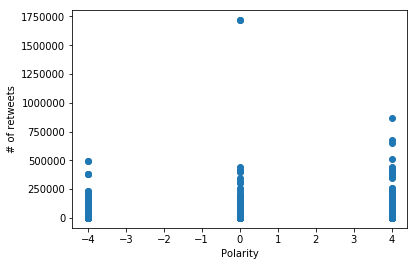

In [9]:
plt.scatter(tweets.polarity,tweets.retweet)
axes = plt.gca()
plt.xlabel('Polarity')
plt.ylabel('# of retweets')
plt.rcParams['figure.figsize'] = 10,20
plt.show()

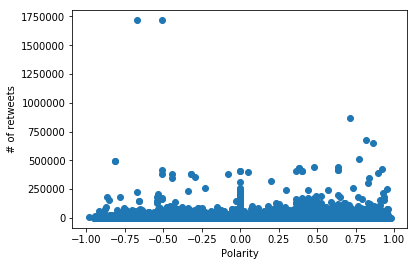

In [11]:
plt.scatter(newTweets['comp_vader'],newTweets['retweet'])
axes = plt.gca()
plt.xlabel('Polarity')
plt.ylabel('# of retweets')
plt.rcParams['figure.figsize'] = 5,5
plt.show()

In [12]:
c = Counter(newTweets['comp_vader'])
rt = Counter(newTweets['retweet'])
print("Total # of values is: %d " % len(newTweets['comp_vader']))
print("There are %d polarity values in c" % len(c))
print("There are %d that are 0.0 in c" % c[0.0])

print("-----------------------------------------")
print("There are %d count values in rt" % len(rt))
print("There are %d that are 0 in rt" % rt[0])

print([r for r in rt if r > 1500000])

Total # of values is: 35760 
There are 2658 polarity values in c
There are 14726 that are 0.0 in c
-----------------------------------------
There are 10050 count values in rt
There are 2709 that are 0 in rt
[1716883.0]


In [13]:
'''This block starts logistic regression for Text v. Polarity (TextBlob)'''
y = np.array(newTweets['polarity'])
vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1))

X = vectorizer.fit_transform(newTweets['text'])
vocab = np.array(vectorizer.get_feature_names())

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lm = linear_model.LogisticRegression()
result = lm.fit(X_train,y_train)
predicted = lm.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lm.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [15]:
'''This is to check for overfitting; also checks 2 to 11 fold for KFold Cross Validation'''
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
tempList = {}
for i in range(2,11):
    kfold = model_selection.KFold(n_splits=i, random_state=None)
    results = model_selection.cross_val_score(lm, X_train, y_train, cv=kfold, scoring='accuracy')
    tempList[i] = results.mean()
#kfold = model_selection.KFold(n_splits=10, random_state=None)
#results = model_selection.cross_val_score(lm, X_train, y_train, cv=kfold, scoring='accuracy')
#print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

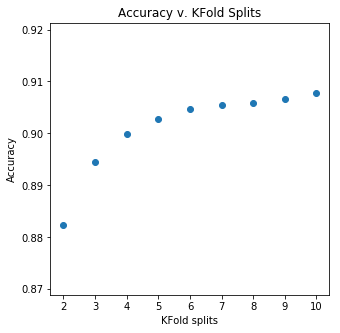

In [16]:
plt.scatter(tempList.keys(),tempList.values())
axes = plt.gca()
plt.title('Accuracy v. KFold Splits')
plt.xlabel('KFold splits')
plt.ylabel('Accuracy')
plt.rcParams['figure.figsize'] = 10,10
plt.show()

In [71]:
#https://apps.timwhitlock.info/emoji/tables/unicode - the xe2, x80, x9f, xf0, xa6, ect.. Are emoji/unicode characters
#Top 10 most frequent terms
col_sums = X.sum(axis=0).A1
top_indices = np.argsort(col_sums)[::-1][:20]
print('top_indices=', top_indices)

top_terms = vocab[top_indices]
top_term_counts = col_sums[top_indices]

#Print the top 10
[x for x in zip(top_terms, top_term_counts)]

top_indices= [12019 23305 48445 55947 54517 49312 43115 36323 23304  6083 19245 57044
 24378 55538 55380 55984 25041 36708 25132 53180]


[('co', 23111),
 ('https', 16479),
 ('the', 15748),
 ('xe2', 15662),
 ('x80', 14331),
 ('to', 13337),
 ('rt', 8063),
 ('of', 7326),
 ('http', 6908),
 ('and', 6796),
 ('for', 6583),
 ('you', 6533),
 ('in', 6490),
 ('xa6', 6458),
 ('x9f', 6354),
 ('xf0', 6313),
 ('is', 5587),
 ('on', 4797),
 ('it', 4563),
 ('we', 4331)]

In [20]:
# Top Weighted Features
coef = lm.coef_[2]
top_coef_ind = np.argsort(coef)[::-1][:20]
top_coef_terms = vocab[top_coef_ind]
top_coef = coef[top_coef_ind]

# Print the top 10.
print('top weighted terms for positive class:')
[x for x in zip(top_coef_terms, top_coef)]

top weighted terms for positive class:


[('happy', 5.8376632393467798),
 ('best', 5.6759983501880305),
 ('lol', 5.4729858734485584),
 ('great', 5.3834950231359384),
 ('good', 5.3449008119676087),
 ('love', 5.1723942065826911),
 ('more', 5.1685024844474263),
 ('live', 5.1554672925577361),
 ('win', 5.0701986050852659),
 ('favorite', 5.0521596467047951),
 ('proud', 4.9592711343558502),
 ('amazing', 4.8967455453175246),
 ('awesome', 4.8863415771362089),
 ('excited', 4.8476449624756786),
 ('new', 4.7046906488921065),
 ('thanks', 4.6837166919861657),
 ('ready', 4.6441350511691981),
 ('own', 4.629710497945398),
 ('better', 4.5921823407278533),
 ('first', 4.5760177140254124)]

In [26]:
spaceTwee = newTweets.loc[(newTweets['name'] == 'johngreen') & (newTweets['retweet'] < 300) & (newTweets['retweet'] > 0) & (newTweets['comp_vader'] != 0)]

In [19]:
'''These are utilized to measure statistics on Obama only'''
obamaOverall = newTweets.loc[(newTweets['name'] == 'BarackObama')]
obamaNeu_avgrt = newTweets.loc[(newTweets['name'] == 'BarackObama') & (newTweets['polarity'] == 0.0)]
obamaPos_avgrt = newTweets.loc[(newTweets['name'] == 'BarackObama') & (newTweets['polarity'] == 4.0)]
obamaNeg_avgrt = newTweets.loc[(newTweets['name'] == 'BarackObama') & (newTweets['polarity'] == -4.0)]

In [20]:
obamaOverall['retweet'].mean(),obamaPos_avgrt['retweet'].mean(), obamaNeu_avgrt['retweet'].mean(), obamaNeg_avgrt['retweet'].mean()

(5674.207908557306, 5462.45501285347, 5375.397153024911, 8389.123188405798)

In [21]:
obamaOverall['fav'].mean(), obamaPos_avgrt['fav'].mean(), obamaNeu_avgrt['fav'].mean(),obamaNeg_avgrt['fav'].mean()

(18760.16496756256, 18740.31555269923, 17197.262633451955, 26828.148550724636)

In [22]:
print(obamaOverall['retweet'].min())
posVader = obamaOverall.loc[(obamaOverall['comp_vader'] < 1)]
posVader['retweet'].min(), posVader['retweet'].max(), posVader['retweet'].mean()

140.0


(140.0, 1716883.0, 5674.207908557306)

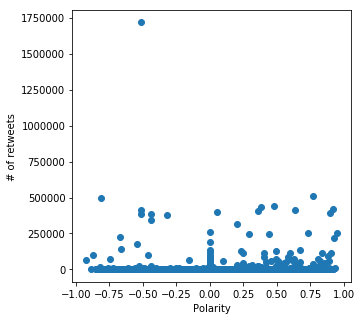

In [24]:
plt.scatter(obamaOverall.comp_vader,obamaOverall.retweet)
axes = plt.gca()
plt.xlabel('Polarity')
plt.ylabel('# of retweets')
plt.rcParams['figure.figsize'] = 5,5
plt.show()

In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
'''Function below is utilized to populate vader values for pandas table X'''
def populate_vader_X(X):
    negList = []
    neuList = []
    posList = []
    compList = []

    sentences = X['text']
    ana = SentimentIntensityAnalyzer()
    for sentence in sentences:
        sentiment = ana.polarity_scores(sentence)
        negList.append(sentiment['neg'])
        neuList.append(sentiment['neu'])
        posList.append(sentiment['pos'])
        compList.append(sentiment['compound'])

    X['neg_vader'] = negList
    X['neu_vader'] = neuList
    X['pos_vader'] = posList
    X['comp_vader'] = compList

In [48]:
'''Start block for PREDICTIVE ANALYSIS (Linear Regression, Random Forest)'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import csv
#tweets1 = csv.reader(open('MannuallyTag.csv','rt'), delimiter=',', quotechar='|')
#reading data from excel file
#ile = pd.read_csv(".csv",encoding="utf-8")
file = pd.read_excel("obama.xlsx")

tempFile = file.loc[(file['fav_count'] == 0)]
print(len(tempFile))

print(tempFile.head())

newFile = file.loc[(file['fav_count'] != 0) & (file['retweet'] != 0) & (file['retweet'] < 250000)]

#This lowers accuracy, dropping indexes
#newFile = newFile.drop(newFile.index[[128,146,124,129,93,175,182,86,186,118,125,140,160,199,110,138,94,144,104]])

tempF = newFile.loc[(newFile['retweet'] == 470)]
#print(tempF)
#newFile = file
#print(len(newFile))

# lets take X be the feature matrix and Y be the target variable
Y= newFile.retweet
X= newFile.ix[:, newFile.columns != 'retweet']

'''obamaOverall['retweet'].mean()
obamaPos_avgrt['retweet'].mean()
obamaNeu_avgrt['retweet'].mean()
obamaNeg_avgrt['retweet'].mean()'''

X['text_len'] = 0
tempLen = []

for i in X['text']:
    tempLen.append(len(i))
    #X['text_len'] = len(i)
X['text_len'] = tempLen    

#X['text_len'] = newFile['text'])
X['avg_re'] = newFile.retweet.mean()
X['avg_fav'] = newFile.fav_count.mean()

populate_vader_X(X)
# create a Python list of feature names
feature_cols = ['naïve_bayes','follower','friendscount','avg_re','avg_fav']
print(X.head())

# use the list to select a subset of the original DataFrame
X1 = X[feature_cols]

#splitting the file into train and test (75% rows in train and 25% in test)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, random_state=1)

#checking train and test files shape
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
Y.head()

353
                                 id                date  \
0   BarackObama  982000000000000000 2018-04-04 14:35:00   
15  BarackObama  964000000000000000 2018-02-14 16:24:00   
22  BarackObama  946000000000000000 2017-12-27 21:02:00   
27  BarackObama  938000000000000000 2017-12-04 22:57:00   
31  BarackObama  929000000000000000 2017-11-11 15:13:00   

                                                 text  polarity  retweet  \
0   b'RT @ObamaFoundation: This week\xe2\x80\x9450...        -4    12828   
15  b'RT @MichelleObama: Happy #ValentinesDay to m...         4    26856   
22  b'RT @MBK_Alliance: I am my Brother\xe2\x80\x9...         4     7368   
27  b'RT @ObamaFoundation: Watch: We hosted a Town...         4     6704   
31  b'RT @ObamaFoundation: Today, we honor those w...         0     8914   

    fav_count   follower  friendscount  avg_re  avg_fav  tweet_num  \
0           0  101652970        623384    5956    20389      15508   
15          0  101652970        623384    59

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


                                id                date  \
1  BarackObama  978000000000000000 2018-03-25 15:34:00   
3  BarackObama  976000000000000000 2018-03-19 21:48:00   
4  BarackObama  976000000000000000 2018-03-19 15:10:00   
5  BarackObama  974000000000000000 2018-03-16 00:22:00   
6  BarackObama  974000000000000000 2018-03-15 23:16:00   

                                                text  polarity  fav_count  \
1  b'Incredible to have a Chicago team in the Fin...         4     223663   
3  b'Our most important task as a nation is to ma...         4     137598   
4  b'In Singapore with young people who are advoc...         4     173985   
5  b'41: I like the competition. And the loyalty ...         0     281448   
6  b'Congrats to @LoyolaChicago and Sister Jean f...         0     130989   

    follower  friendscount       avg_re       avg_fav  tweet_num  naïve_bayes  \
1  101652970        623384  3206.061397  11758.993649      15508            0   
3  101652970        623384

1    20178
3    27306
4    26533
5    29941
6    13179
Name: retweet, dtype: int64


10049.1377339
Accuracy: 0.0194398178853
Actual vs Predicted using Linear Regression
{250: 0.09873060648801128, 500: 0.1847672778561354, 750: 0.2454160789844852, 1000: 0.29055007052186177, 1250: 0.34132581100141046, 1500: 0.38645980253878703, 1750: 0.41748942172073344, 2000: 0.4386459802538787}


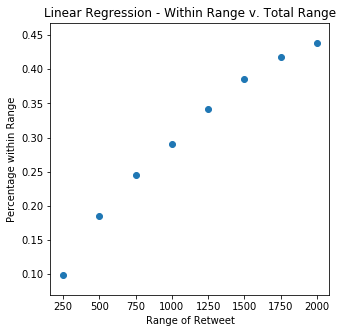

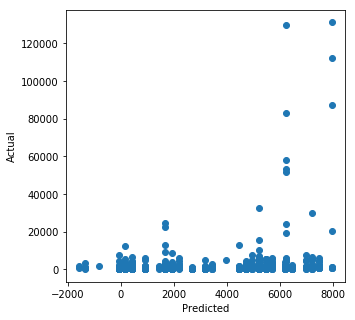

In [45]:
'''Linear Regression on Training Data and Checking on Test Data (Obama Tweets)'''
rf = LinearRegression()
rf.fit(X_train,Y_train)

Y_pred = rf.predict(X_test)
print()
#calculating RMSE
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Accuracy:",rf.score(X_test, Y_test))

print("Actual vs Predicted using Linear Regression")
tempPD = pd.DataFrame({'Predicted Retweet':Y_pred,'Actual Retweets':Y_test})

finTempPD = tempPD
finTempPD['off_by'] = abs(finTempPD['Predicted Retweet'] - finTempPD['Actual Retweets'])

closestVals = finTempPD.loc[(finTempPD['off_by'] < 1500)]
listOfRanges = [250,500,750,1000,1250,1500,1750,2000]
holdVals = {}

for i in listOfRanges:
    closestVals = finTempPD.loc[(finTempPD['off_by'] < i)]
    accScore = len(closestVals)/len(finTempPD)
    holdVals[i] = accScore
    
    
print(holdVals)

plt.scatter(holdVals.keys(),holdVals.values())
plt.title('Linear Regression - Within Range v. Total Range')
plt.xlabel('Range of Retweet')
plt.ylabel('Percentage within Range')
plt.rcParams['figure.figsize'] = 5,5
plt.show()

plt.scatter(Y_pred,Y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = 5,5
plt.show()

8678.91428672
Accuracy: 0.268612632648
Actual vs Predicted using Random Forest
{250: 0.08885754583921016, 500: 0.1861777150916784, 750: 0.29901269393511987, 1000: 0.44428772919605075, 1250: 0.6304654442877292, 1500: 0.8025387870239774, 1750: 0.8730606488011283, 2000: 0.8829337094499294}


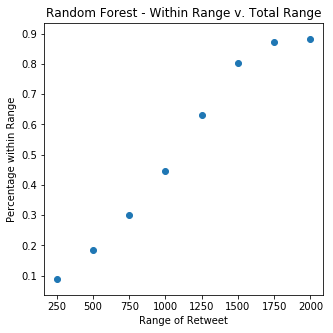

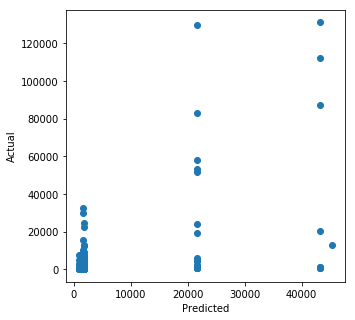

In [46]:
'''Random Forest on Training Data and Checking on Test Data (Obama Tweets). 
Also prints top misclassified predictions and graphs accuracy of range of tweets'''

rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

Y_pred = rf.predict(X_test)

#calculating RMSE
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("Accuracy:",rf.score(X_test, Y_test))

print("Actual vs Predicted using Random Forest")
tempPD2 = pd.DataFrame({'Predicted Retweet':Y_pred,'Actual Retweets':Y_test})

#finTempPD = tempPD.loc[(tempPD['Predicted Retweet'] < 40000) & (tempPD['Actual Retweets'] < 10000)]
finTempPD = tempPD2
finTempPD['off_by'] = abs(finTempPD['Predicted Retweet'] - finTempPD['Actual Retweets'])

listOfRanges = [250,500,750,1000,1250,1500,1750,2000]
holdVals = {}

for i in listOfRanges:
    closestVals = finTempPD.loc[(finTempPD['off_by'] < i)]
    accScore = len(closestVals)/len(finTempPD)
    holdVals[i] = accScore
    
    
print(holdVals)

plt.scatter(holdVals.keys(),holdVals.values())
plt.title('Random Forest - Within Range v. Total Range')
plt.xlabel('Range of Retweet')
plt.ylabel('Percentage within Range')
plt.rcParams['figure.figsize'] = 5,5
plt.show()

    
closestVals = finTempPD.loc[(finTempPD['off_by'] < 500)]
accScore = len(closestVals)/len(finTempPD)

plt.scatter(Y_pred,Y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.rcParams['figure.figsize'] = 5,5
plt.show()


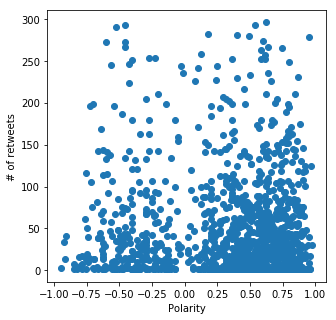

In [38]:
plt.scatter(spaceTwee['comp_vader'],spaceTwee['retweet'])
axes = plt.gca()
plt.xlabel('Polarity')
plt.ylabel('# of retweets')
plt.rcParams['figure.figsize'] = 10,20
plt.show()

In [39]:
'''Misc analysis on John Green's pos and neg comp_vader tweets'''
spaceTwee = tweets.loc[(tweets['name'] == 'johngreen') & (tweets['retweet'] > 1000)]

In [40]:
newTwee = tweets.loc[(tweets['name'] == 'johngreen') & (tweets['retweet'] == 0)]

In [41]:
posGreen = newTweets.loc[(newTweets['name'] == 'johngreen') & (newTweets['comp_vader'] > 0)]
negGreen = newTweets.loc[(newTweets['name'] == 'johngreen') & (newTweets['comp_vader'] < 0)]

In [42]:
print(negGreen, posGreen)

            name            id              date  \
44977  johngreen  9.630000e+17  13-02-2018 12:57   
44993  johngreen  9.620000e+17  08-02-2018 15:14   
45019  johngreen  9.610000e+17  07-02-2018 16:02   
45039  johngreen  9.590000e+17  02-02-2018 18:15   
45063  johngreen  9.590000e+17  31-01-2018 18:51   
45077  johngreen  9.590000e+17  31-01-2018 00:40   
45099  johngreen  9.570000e+17  25-01-2018 17:38   
45101  johngreen  9.570000e+17  25-01-2018 17:37   
45111  johngreen  9.560000e+17  23-01-2018 23:04   
45125  johngreen  9.540000e+17  19-01-2018 22:05   
45131  johngreen  9.540000e+17  19-01-2018 17:38   
45165  johngreen  9.520000e+17  12-01-2018 13:02   
45179  johngreen  9.510000e+17  10-01-2018 17:45   
45181  johngreen  9.510000e+17  10-01-2018 17:41   
45183  johngreen  9.510000e+17  10-01-2018 17:35   
45193  johngreen  9.500000e+17  08-01-2018 17:28   
45209  johngreen  9.470000e+17  29-12-2017 23:50   
45215  johngreen  9.470000e+17  29-12-2017 18:43   
45233  johng

In [46]:
print(negGreen['retweet'].mean(), posGreen['retweet'].mean())

1021.3811563169165 440.4044303797468
